## Observations and Insights 

In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#

In [5]:
# Checking the number of mice in the DataFrame.
num_mice = len(mouse_study_df["Mouse ID"].value_counts())
num_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study_df.groupby(["Mouse ID", "Timepoint"])["Mouse ID"].count()
duplicate_df = pd.DataFrame(duplicate)
duplicate_df


Mouse ID
Mouse ID Timepoint          
a203     0                 1
         5                 1
         10                1
         15                1
         20                1
...                      ...
z969     25                1
         30                1
         35                1
         40                1
         45                1

[1888 rows x 1 columns]

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_df.set_index(["Mouse ID"])
mouse_study_df
clean_mice_df =  mouse_study_df.drop(["g989"])
clean_mice_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [9]:
clean_mice_df = clean_mice_df.reset_index()
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(clean_mice_df["Mouse ID"].value_counts())
clean_num_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_mice_df.groupby("Drug Regimen")

mean = drug_regimen.mean()["Tumor Volume (mm3)"]
mean.name = "Mean"
median = drug_regimen.median()["Tumor Volume (mm3)"]
median.name = "Median"
variance = drug_regimen.var()["Tumor Volume (mm3)"]
variance.name = "Variance"
st_deviation = drug_regimen.std()["Tumor Volume (mm3)"]
st_deviation.name = "Standard deviation"
sem =  drug_regimen.sem()["Tumor Volume (mm3)"]
sem.name = "SEM"
# mice_summary_df = pd.DataFrame({"Mean":[mean], "Median":[median], "Variance":[variance], "Standard deviation":[st_deviation], "SEM":[sem]})
mice_summary_df = pd.DataFrame([mean, median, variance, st_deviation, sem]).T
mice_summary_df                          
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df
# This method produces everything in a single groupby function.

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [17]:
clean_miceplot = clean_mice_df.groupby("Drug Regimen").count()["Mouse ID"]
clean_miceplot_df = pd.DataFrame(clean_miceplot)
clean_miceplot_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


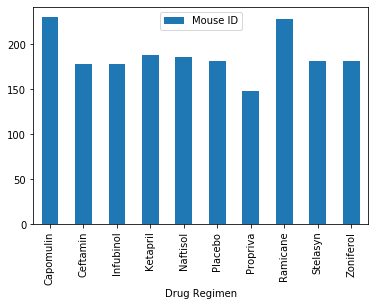

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

clean_miceplot_df.plot(kind="bar")
plt.show()

In [19]:
clean_micepyplot_df = clean_miceplot_df.reset_index()
clean_micepyplot_df

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


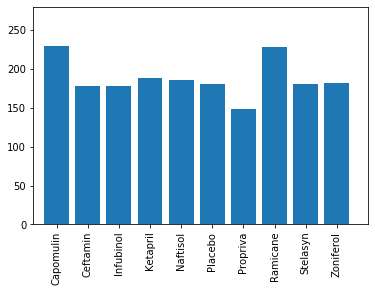

In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(clean_micepyplot_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, clean_micepyplot_df["Mouse ID"], align="center")
plt.xticks(tick_locations, clean_micepyplot_df["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(clean_micepyplot_df["Mouse ID"])+50)
plt.show()           

## Pie Plots

Text(0.5, 1.0, 'Distribution of Male Vs Female Mice')

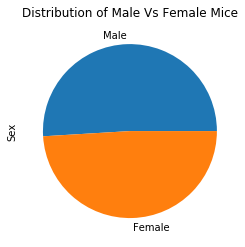

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_df = clean_mice_df["Sex"].value_counts()
pie_plot_df.plot.pie()
plt.title("Distribution of Male Vs Female Mice")

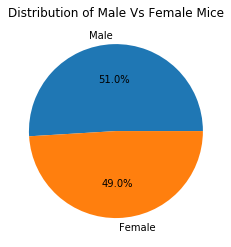

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Male", "Female"
plt.pie(pie_plot_df, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of Male Vs Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

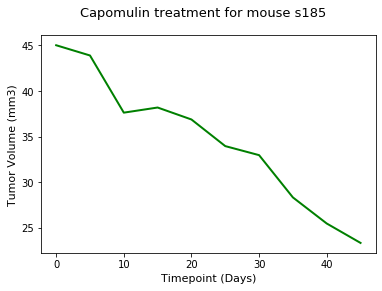

In [95]:
# Generate a line plot of time point versus tumor volume for a mouse s185 treated with Capomulin

# Slice the clean data so that it just has rows for Capomulin treatment for a mouse with ID s185
line_plot_df = clean_mice_df.loc[(clean_mice_df["Drug Regimen"]=="Capomulin") & (clean_mice_df["Mouse ID"]=="s185"),["Mouse ID","Timepoint", "Tumor Volume (mm3)"]]

mouse_treatment, = plt.plot(line_plot_df["Timepoint"], line_plot_df["Tumor Volume (mm3)"], color="green", linewidth=2)

# get reference to the current figure
fig = plt.gcf()
fig.suptitle('Capomulin treatment for mouse s185', fontsize=13)

# set labels for x and y axis
plt.xlabel('Timepoint (Days)', fontsize=11)
plt.ylabel('Tumor Volume (mm3)', fontsize=11)
plt.show()

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
